In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

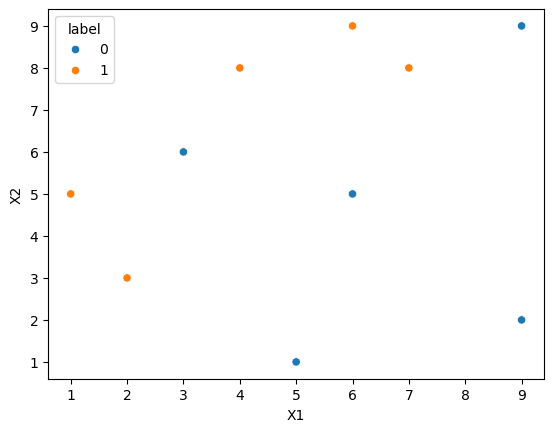

In [6]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weights']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1=DecisionTreeClassifier(max_depth=1)

In [11]:
## When to Use Each:
### Use .values if:
#### You're working with libraries that require NumPy arrays (e.g., older versions of Scikit-learn).
#### You want the data in a more compact, memory-efficient format without column labels.
### Use without .values if:
#### You want to retain metadata (like column names and index) for interpretability or further manipulation.
#### Your downstream operations support Pandas objects directly.
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [12]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [13]:
 from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

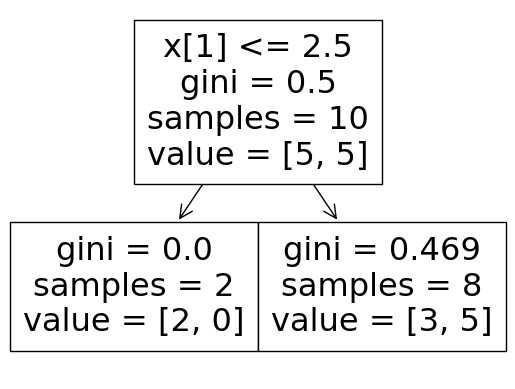

In [14]:
plot_tree(dt1)

In [15]:
df['y_pred']=dt1.predict(X)

In [16]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [57]:
# error=0.3 bcoz 3 points has been misclassified(0.1+0.1+0.1)
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.00000001))

In [58]:
# Step 3 - calculate model weight
alpha1=calculate_model_weight(0.3)
alpha1

0.4236489135269354

In [59]:
# Step 4 - Update Weights
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [60]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [61]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [62]:
df['updated_weights'].sum()

0.9165153319682015

In [63]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [64]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [65]:
df['normalized_weights'].sum()

1.0

In [66]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [67]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [68]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [69]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [70]:
index_values=create_new_dataset(df)

In [71]:
index_values

[6, 6, 2, 4, 8, 2, 2, 9, 1, 8]

In [72]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [73]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
9,9,2,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1


In [74]:
dt2=DecisionTreeClassifier(max_depth=1)

In [75]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [76]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]')]

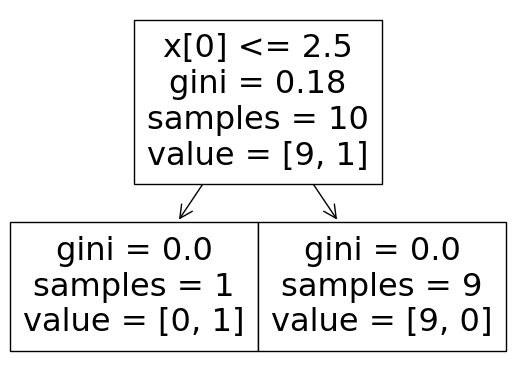

In [77]:
plot_tree(dt2)

<Axes: >

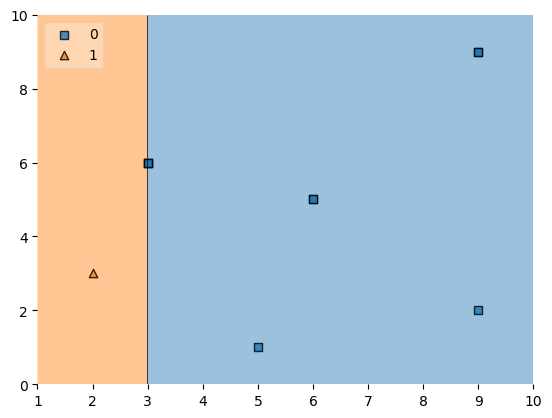

In [78]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [79]:
second_df['y_pred']=dt2.predict(X)

In [80]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0


In [104]:
alpha2=calculate_model_weight(0)

In [105]:
alpha2

9.210340371976184

In [106]:
# Step 4 - Update Weights
def update_row_weights(row,alpha=1.09):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [107]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [108]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.033622,0.1,0.1,0.0
6,6,5,0,0.1,0,0.033622,0.1,0.2,0.1
2,3,6,0,0.1,0,0.033622,0.1,0.3,0.2
4,5,1,0,0.1,0,0.033622,0.1,0.4,0.3
8,9,9,0,0.1,0,0.033622,0.1,0.5,0.4
2,3,6,0,0.1,0,0.033622,0.1,0.6,0.5
2,3,6,0,0.1,0,0.033622,0.1,0.7,0.6
9,9,2,0,0.1,0,0.033622,0.1,0.8,0.7
1,2,3,1,0.1,1,0.033622,0.1,0.9,0.8
8,9,9,0,0.1,0,0.033622,0.1,1.0,0.9


In [109]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [110]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
6,6,5,0,0.1,0,0.033622,0.1,0.1,0.0
6,6,5,0,0.1,0,0.033622,0.1,0.2,0.1
2,3,6,0,0.1,0,0.033622,0.1,0.3,0.2
4,5,1,0,0.1,0,0.033622,0.1,0.4,0.3
8,9,9,0,0.1,0,0.033622,0.1,0.5,0.4
2,3,6,0,0.1,0,0.033622,0.1,0.6,0.5
2,3,6,0,0.1,0,0.033622,0.1,0.7,0.6
9,9,2,0,0.1,0,0.033622,0.1,0.8,0.7
1,2,3,1,0.1,1,0.033622,0.1,0.9,0.8
8,9,9,0,0.1,0,0.033622,0.1,1.0,0.9


In [111]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [112]:
second_df['cumsum_upper']=np.cumsum(second_df['normalized_weights'])

In [113]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalized_weights']

In [114]:
second_df[['X1','X2','label','weights','y_pred','updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.033622,0.1,0.0,0.1
6,6,5,0,0.1,0,0.033622,0.1,0.1,0.2
2,3,6,0,0.1,0,0.033622,0.1,0.2,0.3
4,5,1,0,0.1,0,0.033622,0.1,0.3,0.4
8,9,9,0,0.1,0,0.033622,0.1,0.4,0.5
2,3,6,0,0.1,0,0.033622,0.1,0.5,0.6
2,3,6,0,0.1,0,0.033622,0.1,0.6,0.7
9,9,2,0,0.1,0,0.033622,0.1,0.7,0.8
1,2,3,1,0.1,1,0.033622,0.1,0.8,0.9
8,9,9,0,0.1,0,0.033622,0.1,0.9,1.0


In [115]:
index_values=create_new_dataset(second_df)

In [116]:
third_df=second_df.iloc[index_values,[0,1,2,3]]

In [117]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1


In [118]:
dt3=DecisionTreeClassifier(max_depth=1)

In [119]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [120]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

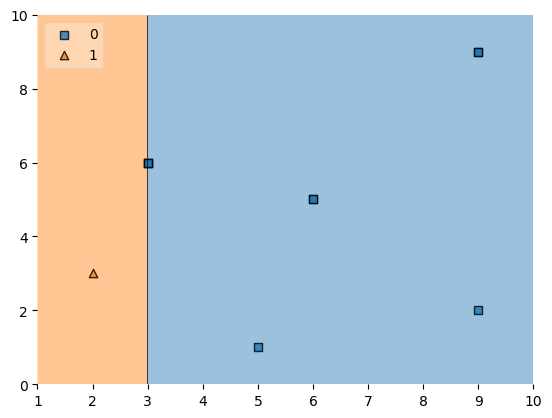

In [121]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [122]:
third_df['y_pred']=dt3.predict(X)

In [123]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,1
6,6,5,0,0.1,0


In [124]:
alpha3=calculate_model_weight(0.7)

In [125]:
alpha3

-0.42364893733645886

In [126]:
print(alpha1,alpha2,alpha3)

0.4236489135269354 9.210340371976184 -0.42364893733645886


## Prediction

In [127]:
query=np.array([1,5]).reshape(1,2)

In [128]:
dt1.predict(query)

array([1], dtype=int64)

In [129]:
dt2.predict(query)

array([1], dtype=int64)

In [130]:
dt3.predict(query)

array([1], dtype=int64)

In [132]:
alpha1*1+alpha2*(1)+alpha3*(1)

9.21034034816666

In [133]:
np.sign(9.21)

1.0

In [134]:
query=np.array([9,9]).reshape(1,2)

In [135]:
dt1.predict(query)

array([1], dtype=int64)

In [136]:
dt2.predict(query)

array([0], dtype=int64)

In [137]:
dt3.predict(query)

array([0], dtype=int64)

In [138]:
alpha1*(1)+alpha2*(-1)+alpha3*(-1)

-8.363042521112789

In [139]:
np.sign(-8.363)

-1.0

# THANKS